# HierarchicalClustering

Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. 

t-SNE, which we'll consider later, creates a 2D map of any dataset, and conveys useful information about the proximity of the samples to one another.

Hierarchical clustering of the grain data

In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

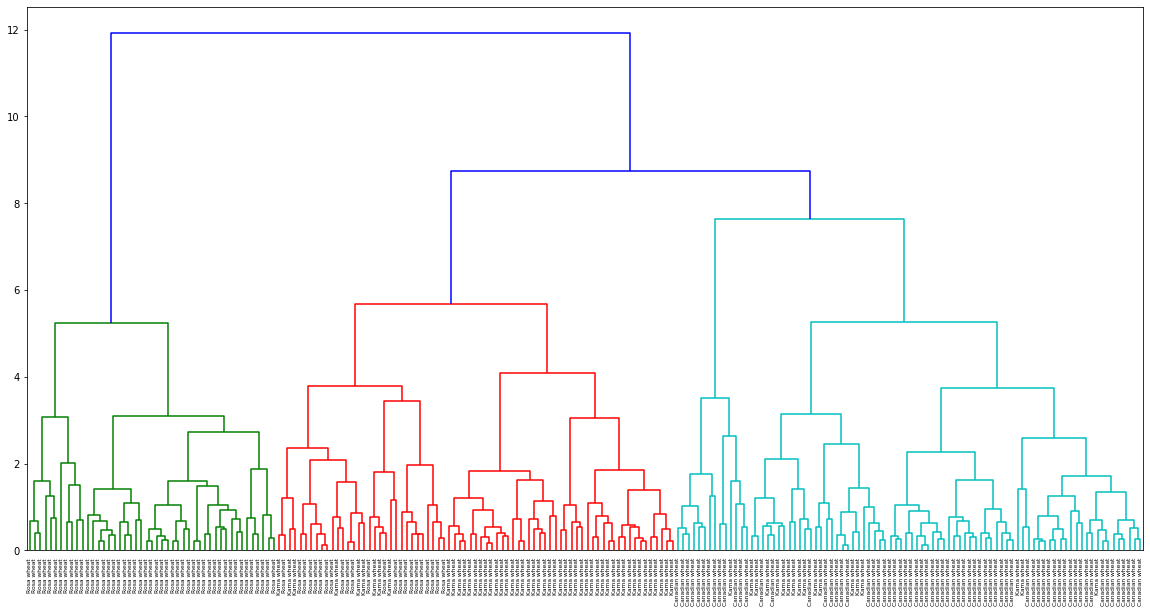

In [43]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

points = pd.read_csv("seeds.csv",header=None)
samples = points.iloc[:,0:7]
variety = points.iloc[:,7].values
varieties = []
for elem in variety:
    if elem == 1:
        varieties.append('Kama wheat')
    if elem == 2:
        varieties.append('Rosa wheat')
    if elem == 3:
        varieties.append('Canadian wheat')

df['varieties']= varieties

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


## Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [44]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,0,0,47
2,0,52,23
3,13,1,0
4,57,17,0


## Hierarchies of stocks

We'll perform hierarchical clustering of companies. 
We create a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. 

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

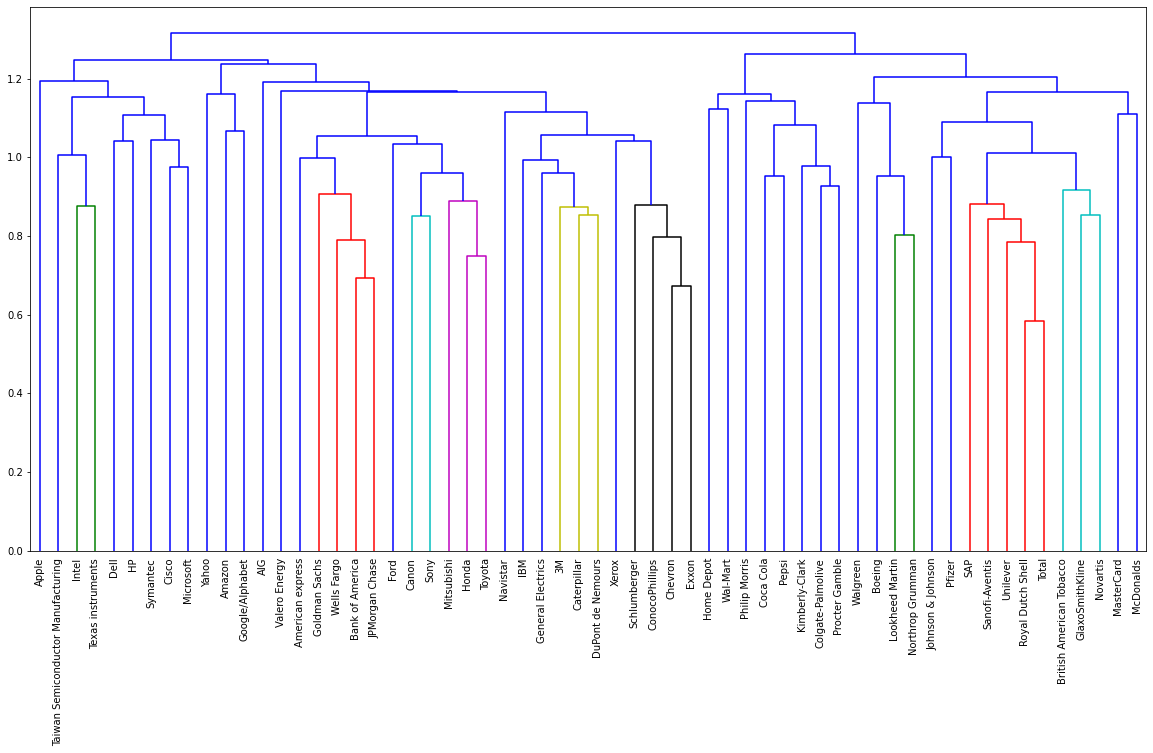

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Import normalize
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt

stock = pd.read_csv("company-stock-movements-2010-2015-incl.csv",header=0)
movements = stock.iloc[:,1:].values
companies = stock.iloc[:,0].values


# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
labels= companies,
leaf_rotation=90,
leaf_font_size=10)

plt.show()


Now, we'll learn how to extract the clusters from intermediate stages of a hierarchical clustering. The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means.

An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram.

But what is the meaning of the height?

The y-axis of the dendrogram encodes the distance between merging clusters. 

So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the hierarchical clustering should stop merging clusters when all clusters are at least this far apart.

### Distance between clusters

The distance between two clusters is measured using a linkage method. In our example, we used complete linkage, where the distance between two clusters is the maximum of the distances between their samples. This was specified via the method parameter. There are many other linkage methods, and we'll see in the examples that different linkage methods give different hierarchical clusterings!

### Extracting cluster labels
The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function. 

<strong>In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.</strong>

## Different linkage, different hierarchical clustering!

We will perform a hierarchical clustering of the voting countries with 'single' linkage. Different linkage, different hierarchical clustering!


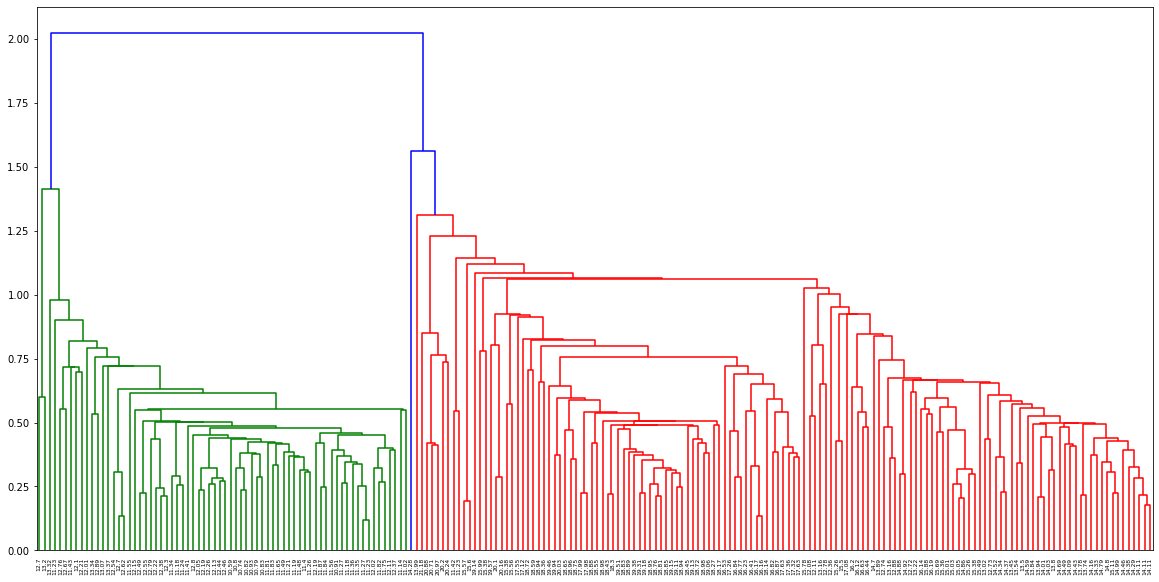

In [46]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

samples = points.iloc[:,0:9]
country_names = points.iloc[:,0].values


# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
labels=country_names,
leaf_rotation=90,
leaf_font_size=6)
plt.show()


## t-SNE for 2-dimensional maps

In this exercise, we'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot.




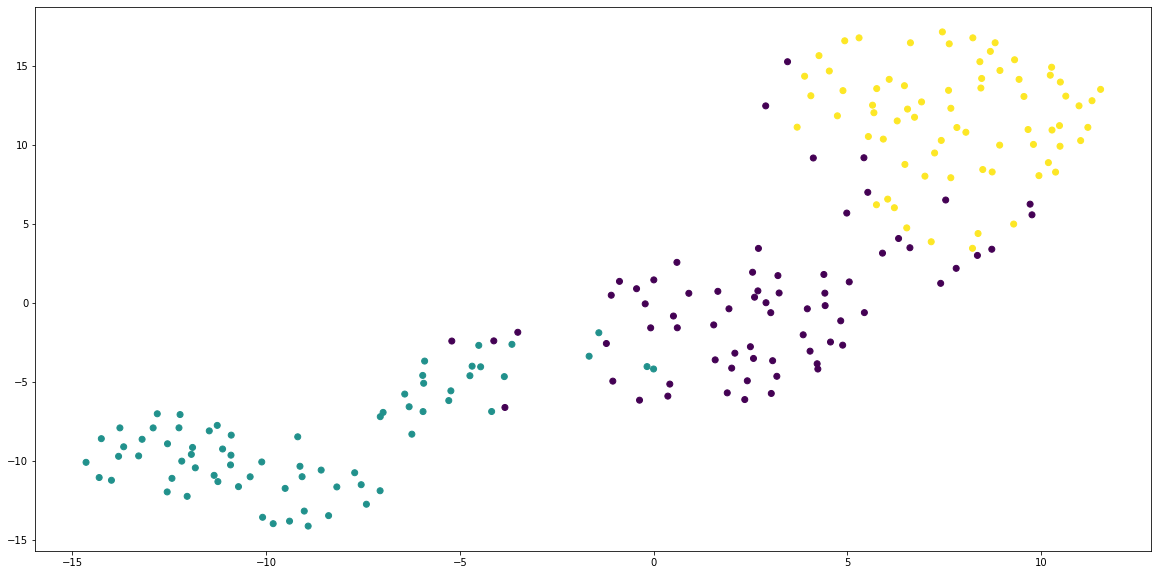

In [48]:
# Import TSNE
from sklearn.manifold import TSNE

points = pd.read_csv("seeds.csv",header=None)
samples = points.iloc[:,0:7]
variety_numbers = points.iloc[:,7].values


# Create a TSNE instance: model
model  = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

### A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, we'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! 

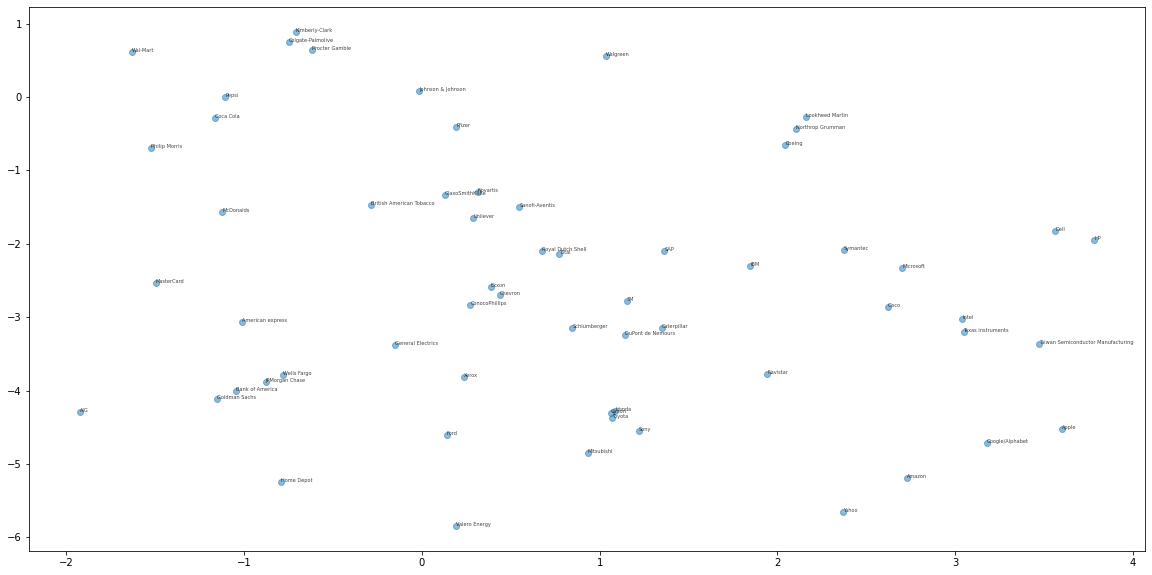

In [49]:
# Import TSNE
from sklearn.manifold import TSNE

stock = pd.read_csv("company-stock-movements-2010-2015-incl.csv",header=0)
#The stock price movements for each company are available as the array normalized_movements
movements = stock.iloc[:,1:].values
#The list companies gives the name of each company.
companies = stock.iloc[:,0].values

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
